In [ ]:
"""
Autor: José Carlos Dávila Almazán
Date: 31/09/2021
"""

In [13]:
#Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as mpl
import seaborn as sns

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# Configure visualisations
#matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

credit_reports = pd.read_csv("credit_reports.csv")
users = pd.read_csv("users.csv")
#credit_reports.head()
#users.head()

In [ ]:
#Analizying the structre of credit_reports.csv
print("Shapes of credit reports")
print(credit_reports.shape)
print("Data types of credit reports")
print(credit_reports.dtypes)
print("Data description for credit reports")
credit_reports.describe()

In [ ]:
#Analizying  the structure of users.csv
print("Shapes of users\n")
print(users.shape)
print("Data types of users")
print(users.dtypes)
print("Data description for credit users")
users.describe()

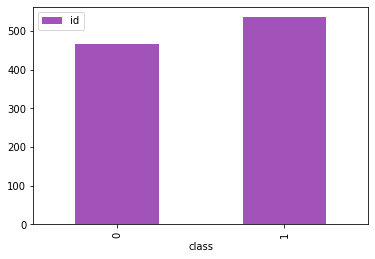

In [45]:
#Good and bad users
usersgp_cl=users.groupby("class").agg({
    "id":"count"
})
usersgp_cl.head()
#0=465; 1=535 53%
ugraph1=usersgp_cl.plot.bar(color={"id":"#A153B9"})



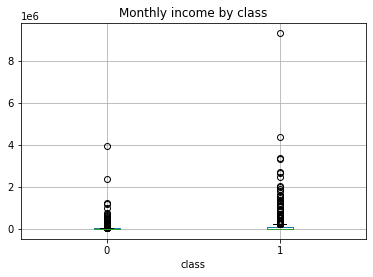

In [52]:
#Monthly income by class
fig_mi_bc=users.boxplot(column= "monthly_income", by ="class")
title_boxplot = 'Monthly income by class'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.show()

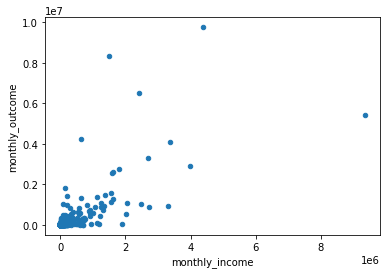

In [74]:
#Income/Outcome
def incomeoutcome(fila):
    result=fila["monthly_income"]-fila["monthly_outcome"]
    return result
users["monthly available"]=users.apply(incomeoutcome,axis=1)
users.head()

users.plot(kind="scatter",x="monthly_income", y="monthly_outcome")
plt.show()



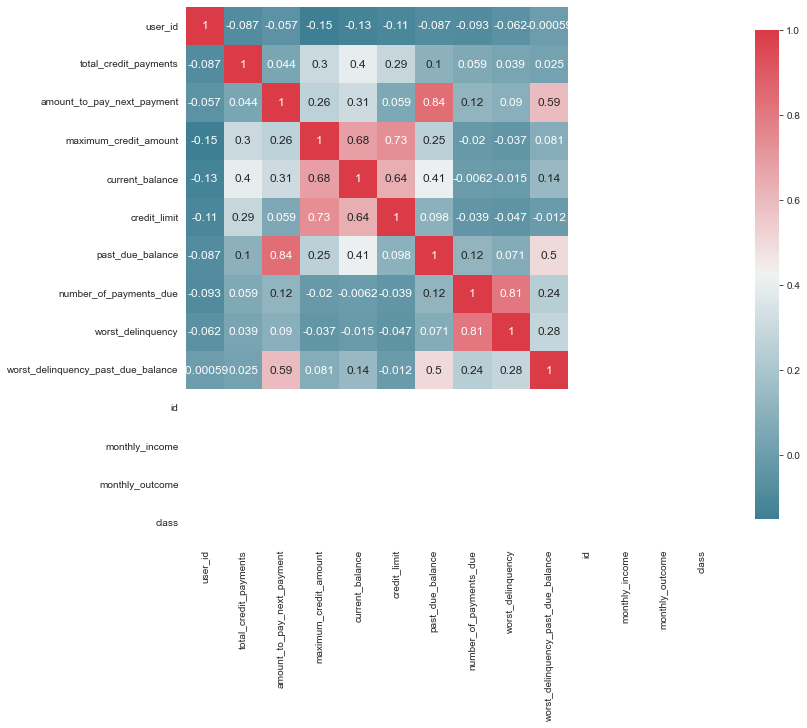

In [14]:
credit_reports = pd.read_csv("credit_reports.csv")
users = pd.read_csv("users.csv")
fulltime= credit_reports.append( users , ignore_index = True )
credit_reportsF = fulltime[ :1000 ]

def plot_correlation_map( df ):
    corr = credit_reportsF.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

plot_correlation_map(credit_reportsF)